In [38]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
import numpy as np
import matplotlib as mpl
import glob
import matplotlib
from scipy.io import FortranFile
import struct
import os

In [63]:
def read_var(filename,varname,size):
    f=open(filename+"/"+varname, "rb")
    dat = np.fromfile(f, dtype=np.float64, count=size, sep='')
    return dat

def read_parameter_file(fname="",evaluate=True,verbose=True,delimiter="="):
    # Read info file and create dictionary
    try:
        with open(fname) as f:
            content = f.readlines()
        f.close()
    except IOError:
        # Clean exit if the file was not found
        if verbose:
            print("File not found: "+fname)
        return 0
    infos={}
    for line in content:
        sp = line.split(delimiter)
        #print(sp)
        if len(sp) > 1:
            if evaluate:
                try:
                    infos[sp[0].strip()] = eval(sp[1].strip())
                except (NameError,SyntaxError):
                    infos[sp[0].strip()] = sp[1].strip()
            else:
                infos[sp[0].strip()] = sp[1].strip()
    return infos


def read_output(path='.'):
    filename= path+"/ion_files"
    infos=read_parameter_file(fname=filename+'/info.dat')
    data={}
    data['infos']=infos
    for key in infos:
        print(key+' = ',infos[key])
    data['nh'] = read_var(filename,'nh' , infos['nnh'])
    data['ni'] = read_var(filename,'ni' , infos['nnh'])
    data['ne'] = read_var(filename,'ne'  , infos['nnh'])
    data['eta_o'] = read_var(filename,'eta_o'  , infos['nnh'])
    data['eta_h'] = read_var(filename,'eta_h'  , infos['nnh'])
    data['eta_a'] = read_var(filename,'eta_a'  , infos['nnh'])
    data['sigma_o'] = read_var(filename,'sigma_o'  , infos['nnh'])
    data['sigma_h'] = read_var(filename,'sigma_h'  , infos['nnh'])
    data['sigma_p'] = read_var(filename,'sigma_p'  , infos['nnh'])

    tau = read_var(filename,'tau'  , infos['nnh']*(infos['ndust']+2))
    sigma = read_var(filename,'sigma'  , infos['nnh']*(infos['ndust']+2))
    omega_B = read_var(filename,'omega_B', infos['nnh']*(infos['ndust']+2))
    data['sigma']   = np.reshape(sigma,(infos['ndust']+2,infos['nnh']),order = "C").T
    data['tau']     = np.reshape(tau,(infos['ndust']+2,infos['nnh']),order = "C").T 
    data['omega_B'] = np.reshape(omega_B,(infos['ndust']+2,infos['nnh']),order = "C").T 
    zd = read_var(filename,'zd'  , infos['nnh']*infos['ndust'])
    data['zd'] = np.reshape(zd,(infos['ndust'],infos['nnh']),order = "C").T

    return data

nnh =  100
ndust =  10


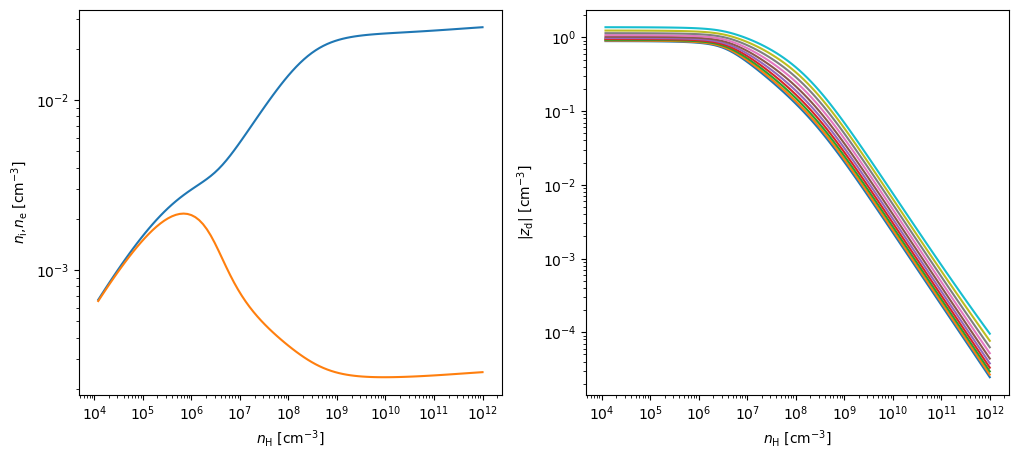

In [64]:
data= read_output()
fig,ax= plt.subplots(1,2)
fig.set_size_inches(12,5)

ax[0].loglog(data['nh'],data['ni'],label='ni')
ax[0].loglog(data['nh'],data['ne'],label='ne')
ax[0].set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax[0].set_ylabel('$n_{\\mathrm{i}}$,$n_{\\mathrm{e}}$ [cm$^{-3}$]')

for idust in range(data['infos']['ndust']):
    #print(data['zd'][:,idust])
    ax[1].loglog(data['nh'],-data['zd'][:,idust])

ax[1].set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax[1].set_ylabel('$|z_{\\mathrm{d}}|$ [cm$^{-3}$]')

plt.show()


nnh =  100
ndust =  10


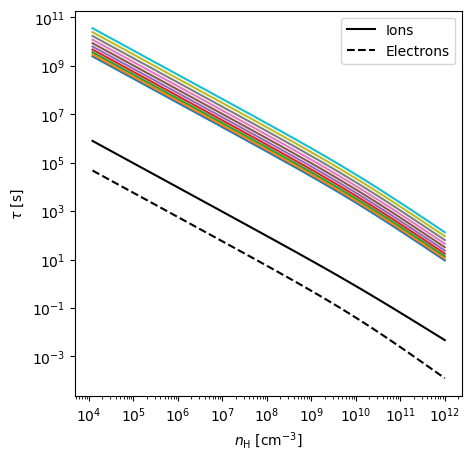

In [65]:
data= read_output()
fig,ax= plt.subplots(1,1)
fig.set_size_inches(5,5)
for idust in range(data['infos']['ndust']):
    #print(data['zd'][:,idust])
    ax.loglog(data['nh'],data['tau'][:,idust])

ax.loglog(data['nh'],data['tau'][:,data['infos']['ndust']],color='k', label='Ions')
ax.loglog(data['nh'],data['tau'][:,data['infos']['ndust']+1],color='k', ls='dashed', label='Electrons')
plt.legend()
ax.set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax.set_ylabel('$\\tau$ [s]')

plt.show()

nnh =  100
ndust =  10


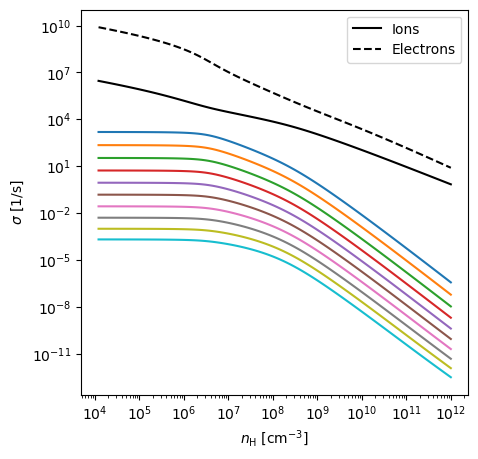

In [62]:
data= read_output()
fig,ax= plt.subplots(1,1)
fig.set_size_inches(5,5)
for idust in range(data['infos']['ndust']):
    #print(data['zd'][:,idust])
    ax.loglog(data['nh'],data['sigma'][:,idust])

ax.loglog(data['nh'],data['sigma'][:,data['infos']['ndust']],color='k', label='Ions')
ax.loglog(data['nh'],data['sigma'][:,data['infos']['ndust']+1],color='k', ls='dashed', label='Electrons')
plt.legend()
ax.set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax.set_ylabel('$\\sigma$ [1/s]')

plt.show()

nnh =  100
ndust =  10


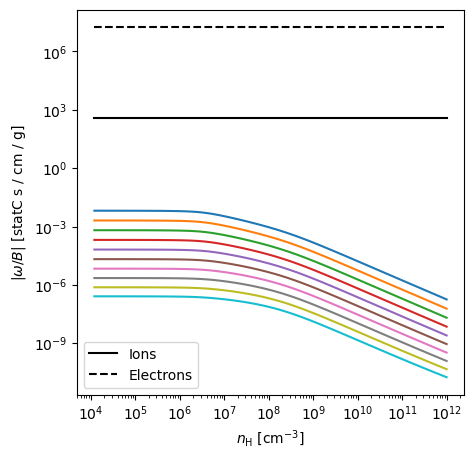

In [67]:
data= read_output()
fig,ax= plt.subplots(1,1)
fig.set_size_inches(5,5)
for idust in range(data['infos']['ndust']):
    #print(data['zd'][:,idust])
    ax.loglog(data['nh'],-data['omega_B'][:,idust])

ax.loglog(data['nh'],data['omega_B'][:,data['infos']['ndust']],color='k', label='Ions')
ax.loglog(data['nh'],-data['omega_B'][:,data['infos']['ndust']+1],color='k', ls='dashed', label='Electrons')
plt.legend()
ax.set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax.set_ylabel('|$\\omega/B$| [statC s / cm / g]')

plt.show()

nnh =  100
ndust =  10


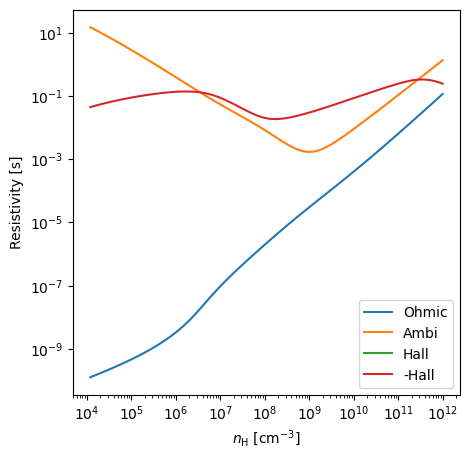

In [44]:
data= read_output()
fig,ax= plt.subplots(1,1)
fig.set_size_inches(5,5)

ax.loglog(data['nh'],data['eta_o'],label='Ohmic')
ax.loglog(data['nh'],data['eta_a'],label='Ambi')
ax.loglog(data['nh'],data['eta_h'],label='Hall')
ax.loglog(data['nh'],-data['eta_h'],label='-Hall')

ax.set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax.set_ylabel('Resistivity [s]')
plt.legend()
plt.show()


nnh =  100
ndust =  10


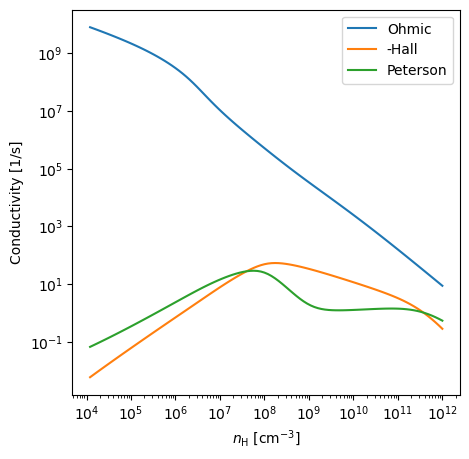

In [47]:
data= read_output()
fig,ax= plt.subplots(1,1)
fig.set_size_inches(5,5)
ax.loglog(data['nh'],data['sigma_o'],label='Ohmic')
ax.loglog(data['nh'],-data['sigma_h'],label='-Hall')
ax.loglog(data['nh'],data['sigma_p'],label='Peterson')


ax.set_xlabel('$n_{\\mathrm{H}}$ [cm$^{-3}$]')
ax.set_ylabel('Conductivity [1/s]')
plt.legend()
plt.show()


159.9308699 - 155.60790859·x + 61.56533395·x² - 13.23340009·x³ +
1.70199253·x⁴ - 0.135016·x⁵ + 0.00648684·x⁶ - 0.00017332·x⁷ +
(1.97807683e-06)·x⁸


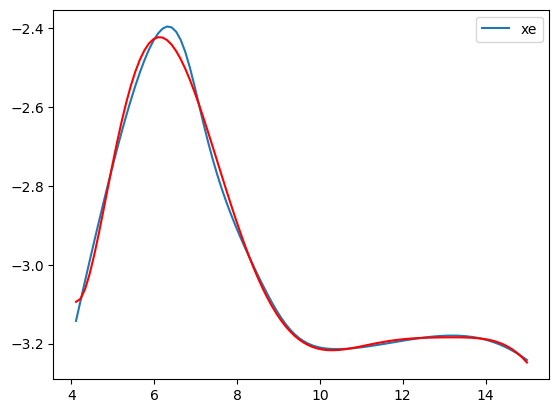

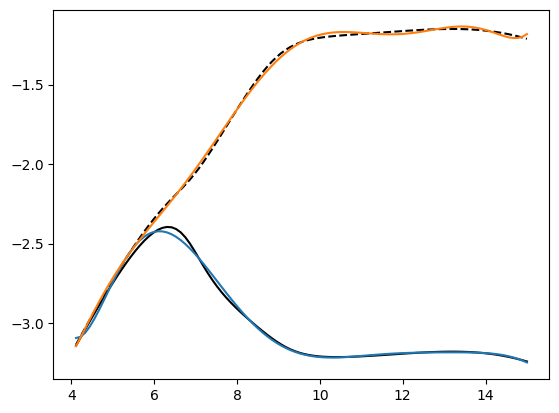

In [322]:
### Failed attempt at polynomial fit. Good but monotonicity not preserved/ Will try later with a barotrop like function.

from scipy.optimize import curve_fit
def func(x,a,b,c,d,e,f,g,h,i):
    return a+b*x+c*x**2+d*x**3+e*x**4+f*x**5+g*x**6+h*x**7+i*x**8

mask =  data['nh']<1e30
xdata = np.log10(data['nh'][mask])
ydata = np.log10(data['ne'][mask])#/data['nh'][mask])
zdata = np.log10(data['ni'][mask])#/data['nh'][mask])

popt_xe, pcov = curve_fit(func,xdata , ydata,maxfev=50000)
popt_xi, pcov = curve_fit(func,xdata , zdata,maxfev=50000)

p = np.polynomial.Polynomial(popt_xe[:])
print(p)
plt.plot(xdata , ydata,label='xe')
plt.plot(xdata, func(xdata, *popt_xe), 'r-')#, label='fit: a=%5.3f, b=%5.3f, c=%5.3f, d=%5.3f, e=%5.6f, f=%5.6f, g=%5.6f, h=%5.6f, i=%5.8f' % tuple(popt))
plt.legend()
plt.show()
ne_fit = (func(xdata, *popt_xe))#*10**(xdata)
ni_fit = (func(xdata, *popt_xi))#*10**(xdata)




plt.plot(xdata,ydata,label='ne',color='k')
plt.plot(xdata,zdata,label='ni',color='k',ls='dashed')

plt.plot(xdata,ne_fit)
plt.plot(xdata,ni_fit)

plt.show()
